Imagine for a moment that you are the person who supervises recruitment for the
New York City police department.

Anyone who wants to be a police officer in New York City, has take a [written
exam](https://www1.nyc.gov/site/nypd/careers/police-officers/po-exam.page). The
city puts on this exam every year or so.

There was a written exam in early 2017; over 10000 people took this exam.

Now it is 2019.   This new iteration of the written exam has just finished, and
you know that about 13000 people took the exam, but the results are not out
yet.  Of course you do have the results from 2017.
You are particularly interested in this year's results, because you are worried
that candidates are starting to find the exam too easy, especially with all the
exam preparation materials that candidates can find and buy.

In order to plan for the year ahead, you need to know if the results are
holding steady.   But, as things stand, you won't get the full results for 2019
for another month.

To help your decision-making, you very much want to get an idea of how good the
results are this year.  You decide to take a random sample of 55
from all the exam papers from this year (2019).  You get them marked quickly.
But - how much information will this sample give you about the eventual results
for 2019?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Here are the
[actual](https://github.com/matthew-brett/datasets/tree/22203c1/nyc_civil_list)
examination results from the big 2017 police written exam.

You can download the file from [nyc_police_exam_sept_2017.csv]({{ site.baseurl
}}/data/nyc_police_exam_sept_2017.csv)

In [2]:
police_2017 = pd.read_csv('nyc_police_exam_sept_2017.csv')
police_2017.head()

,First Name,MI,Last Name,Adj. FA
0,RICARDO,J,CRUZ,71.77
1,PATRICK,M,CARLIN,71.77
2,QUDUS,NaN,ADEBOWALE,71.77
3,ERIC,C,ALLBRIGHT,71.77
4,CRISTIAN,NaN,BENITEZ,71.77


The exam mark is in the column named `Adj. FA`, short for "Adjusted Final
Average".

For convenience, we round the exam scores to the nearest 0.5:

In [20]:
def round_to_p5(vals):
    """ Round values in `vals` to nearest 0.5
    """
    # Multiply by 2, round to nearest integer, and divide by 2 again.
    return np.round(vals * 2) / 2

In [37]:
marks_2017 = police_2017['Adj. FA']

There are about 10000 marks in this table:

In [38]:
len(marks_2017)

10987

Here is the histogram:

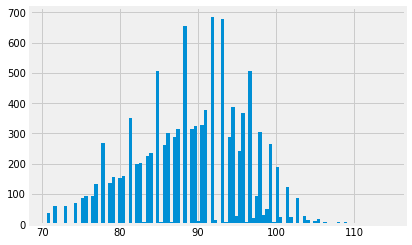

In [39]:
marks_2017.hist(bins=100);

Here are the various statistics for the 2017 marks:

In [40]:
marks_2017.describe()

count    10987.000000
mean        89.164978
std          7.054645
min         70.590000
25%         84.710000
50%         89.710000
75%         94.410000
max        114.410000
Name: Adj. FA, dtype: float64

We are particularly interested in the median.  As you remember, this is the 50% percentile, that you see in the table above.

In [41]:
# Median mark in 2017.
med_2017 = marks_2017.mean()
med_2017

89.16497770091928

Now we look at the sample of 55 exams from 2019 that you marked quickly.

You can download the sample file from [nyc_police_exam_2019_sample.csv]({{
site.baseurl }}/data/nyc_police_exam_2019_sample.csv)

In [43]:
police_2019_sample = pd.read_csv('nyc_police_exam_2019_sample.csv')
# Round marks to nearest 0.5 again.
marks_2019_sample = police_2019_sample['Adj. FA']
marks_2019_sample.head()

0    105.0
1     97.0
2     78.0
3     81.0
4     92.0
Name: Adj. FA, dtype: float64

In [28]:
len(marks_2019_sample)

55

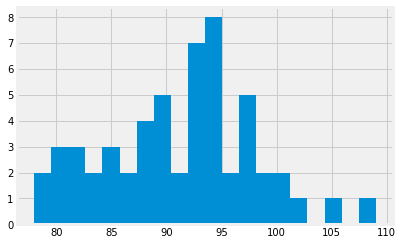

In [44]:
marks_2019_sample.hist(bins=20);

In [30]:
marks_2019_sample.describe()

count     55.000000
mean      91.200000
std        6.786151
min       78.000000
25%       86.500000
50%       92.000000
75%       95.500000
max      109.000000
Name: Adj. FA, dtype: float64

In [45]:
# Median mark in 2019 sample.
med_2019_samp = marks_2019_sample.mean()
med_2019_samp

91.2

The median here is 92.  That seems a bit higher than the 2017 median --- but
have I been deceived by the sample?  Was I just unlucky?   How confident can I
be that the median from the full results will be 91, or 92, or 93, rather than
the 90 of the previous year?

We now enter the territory of *confidence intervals*.

The sample median is 92, but how close is that median likely to be to the
eventual median, once I have all 13000 or so results for 2019?  How *confident*
can I be in this median of around 92?